In [3]:
import numpy as np
import pandas as pd


In [4]:
df=pd.read_csv("C:\\Users\\risha\\PycharmProjects\\PythonProject\\Assets\\creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: xlabel='Class'>

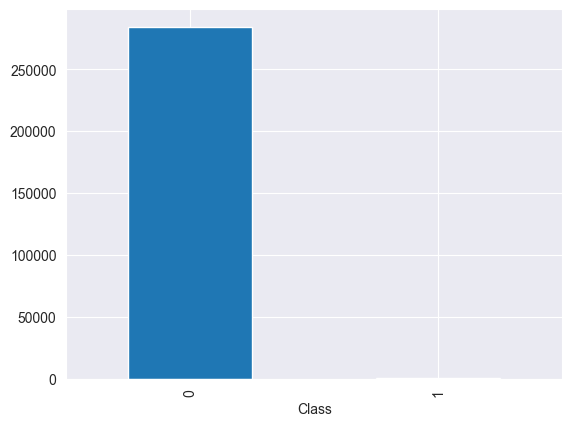

In [6]:
#checking imbalance data
df['Class'].value_counts().plot(kind='bar')

In [7]:
# Technique
# What it does	Pros	Cons
# Undersampling	Remove majority samples,	Simple, fast	Lose information
# Oversampling	Add minority samples,	Keep all data	Risk of overfittin

In [8]:
df=df.sample(n=20000)
df['Class'].value_counts()

Class
0    19971
1       29
Name: count, dtype: int64

In [9]:
#Training model without balancing data
from sklearn.model_selection import train_test_split

X=df.drop('Class',axis=1)
y=df['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier() #object creation
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)

conf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test,y_pred)
print("Classification Report:")
print(class_report)

accuracy=rf_model.score(X_test,y_test)
print("Accuracy:",accuracy)


Confusion Matrix:
[[3995    1]
 [   0    4]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3996
           1       0.80      1.00      0.89         4

    accuracy                           1.00      4000
   macro avg       0.90      1.00      0.94      4000
weighted avg       1.00      1.00      1.00      4000

Accuracy: 0.99975


In [11]:
#Applying RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler()#object creation
X_ros,y_ros=ros.fit_resample(X_train,y_train)

y_ros.value_counts()

Class
0    15975
1    15975
Name: count, dtype: int64

In [12]:
rf_model_ros=RandomForestClassifier()
rf_model_ros.fit(X_ros,y_ros)
y_pred_ros=rf_model_ros.predict(X_test)

conf_matrix_ros=confusion_matrix(y_test,y_pred_ros)
print("Confusion Matrix:")
print(conf_matrix_ros)


class_report_ros = classification_report(y_test,y_pred_ros)
print("Classification Report:")
print(class_report_ros)

accuracy_ros=rf_model_ros.score(X_test,y_test)
print("Accuracy:",accuracy_ros)

Confusion Matrix:
[[3995    1]
 [   0    4]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3996
           1       0.80      1.00      0.89         4

    accuracy                           1.00      4000
   macro avg       0.90      1.00      0.94      4000
weighted avg       1.00      1.00      1.00      4000

Accuracy: 0.99975


In [13]:
#SMOTE-Synthetic miniority samples
# ✅ Creates new, synthetic minority samples
# ✅ Prevents overfitting better than simple duplication
# ✅ Works well with continuous numerical features
# ❌ Not ideal for categorical-only features (other techniques exist for that)

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

smote=SMOTE()

X_smote,y_smote=smote.fit_resample(X_train,y_train)
y_smote.value_counts()

Class
0    15975
1    15975
Name: count, dtype: int64

In [15]:
# Initialize the model
rf_model_smote = RandomForestClassifier()

# Train the model on SMOTE data
rf_model_smote.fit(X_smote, y_smote)

# Predict on the test set
y_pred_smote = rf_model_smote.predict(X_test)

# Calculate confusion matrix
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
print("Confusion Matrix (SMOTE):")
print(conf_matrix_smote)

# Calculate classification report
class_report_smote = classification_report(y_test, y_pred_smote)
print("\nClassification Report (SMOTE):")
print(class_report_smote)

# Calculate accuracy
accuracy_smote = rf_model_smote.score(X_test, y_test)
print("Accuracy (SMOTE):", accuracy_smote)

Confusion Matrix (SMOTE):
[[3995    1]
 [   0    4]]

Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3996
           1       0.80      1.00      0.89         4

    accuracy                           1.00      4000
   macro avg       0.90      1.00      0.94      4000
weighted avg       1.00      1.00      1.00      4000

Accuracy (SMOTE): 0.99975


In [21]:
# Get the input data as a 2D array
inputs_1 = X_test.iloc[[45]].values

# Predict with the model
prediction = rf_model_smote.predict(inputs_1)
print("Actual Class :", y_test.iloc[10])
print("Predicted Class:", prediction[0])

Actual Class : 0
Predicted Class: 0


C:\Users\risha\PycharmProjects\PythonProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [17]:
# Get the input data as a 2D array
inputs_2 = X_test.iloc[[101]].values

# Predict with the model
prediction = rf_model_smote.predict(inputs_1)
print("Actual Class :", y_test.iloc[101])
print("Predicted Class:", prediction[0])

Actual Class : 0
Predicted Class: 0


C:\Users\risha\PycharmProjects\PythonProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
